In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm  # تغییر این خط

# خواندن دیتاست
df = pd.read_csv("train.csv")

# تنظیم مدل و توکنایزر
tokenizer = AutoTokenizer.from_pretrained("m3hrdadfi/albert-fa-base-v2-clf-persiannews")
model = AutoModelForSequenceClassification.from_pretrained("m3hrdadfi/albert-fa-base-v2-clf-persiannews")

# تابع طبقه‌بندی متن‌ها
def classify_text(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted class
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions.item(), float(F.softmax(outputs.logits, dim=-1)[0][predictions])

# ایجاد دیکشنری برای شمارش انواع متن‌ها
dataset_count = {
    "Social": 0,
    "Economic": 0,
    "International": 0,
    "Political": 0,
    "Science Technology": 0,
    "Cultural Art": 0,
    "Sport": 0,
    "Medical": 0,
}

# طبقه‌بندی متن‌ها و به‌روز رسانی دیکشنری با نوار پیشرفت
for text in tqdm(df['context'], desc="Classifying texts"):
    predicted_class, confidence = classify_text(text)
    if predicted_class == 0:
        dataset_count["Social"] += 1
    elif predicted_class == 1:
        dataset_count["Economic"] += 1
    elif predicted_class == 2:
        dataset_count["International"] += 1
    elif predicted_class == 3:
        dataset_count["Political"] += 1
    elif predicted_class == 4:
        dataset_count["Science Technology"] += 1
    elif predicted_class == 5:
        dataset_count["Cultural Art"] += 1
    elif predicted_class == 6:
        dataset_count["Sport"] += 1
    elif predicted_class == 7:
        dataset_count["Medical"] += 1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.88M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/72.4M [00:00<?, ?B/s]

Classifying texts: 100%|██████████| 9008/9008 [1:21:20<00:00,  1.85it/s]


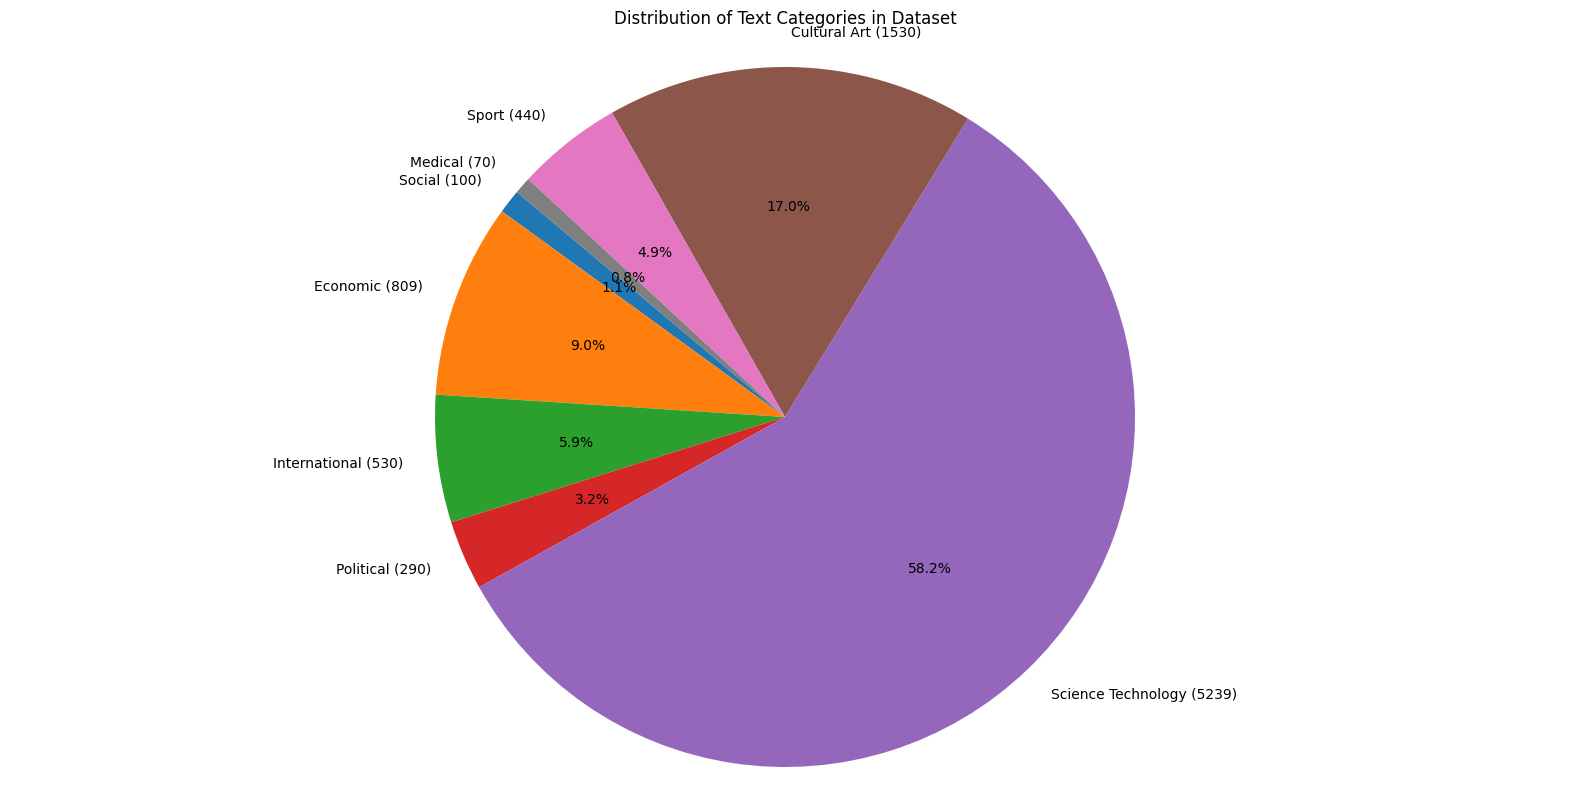

In [ ]:
# رسم نمودار دایره‌ای
labels = [f"{label} ({count})" for label, count in dataset_count.items()]
sizes = dataset_count.values()

plt.figure(figsize=(20, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Text Categories in Dataset')
plt.show()

In [ ]:
# 0. Social	2170
# 1. Economic	1564
# 2. International	1975
# 3. Political	2269
# 4. Science Technology	2436
# 5. Cultural Art	2558
# 6. Sport	1381
# 7. Medical	2085